In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/stats.csv')
df.head()

,dpr,kast,impact,adr,kpr,rating
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.61,75.0%,1.40,85.7,0.82,1.30
2,0.53,76.3%,1.18,77.5,0.75,1.25
3,0.61,72.4%,1.30,80.8,0.81,1.23
4,0.60,72.5%,1.28,81.8,0.78,1.23


In [3]:
df.dropna(inplace=True)
df.head()

,dpr,kast,impact,adr,kpr,rating
1,0.61,75.0%,1.40,85.7,0.82,1.30
2,0.53,76.3%,1.18,77.5,0.75,1.25
3,0.61,72.4%,1.30,80.8,0.81,1.23
4,0.60,72.5%,1.28,81.8,0.78,1.23
5,0.66,72.7%,1.30,85.2,0.79,1.22


In [4]:
df['kast'] = df['kast'].map(lambda x: float(x.strip('%')) / 100.0)
df.head()

,dpr,kast,impact,adr,kpr,rating
1,0.61,0.750,1.40,85.7,0.82,1.30
2,0.53,0.763,1.18,77.5,0.75,1.25
3,0.61,0.724,1.30,80.8,0.81,1.23
4,0.60,0.725,1.28,81.8,0.78,1.23
5,0.66,0.727,1.30,85.2,0.79,1.22


In [6]:
df_corr = df.set_index(['rating'])
df_corr.head()

,dpr,kast,impact,adr,kpr
rating,,,,,
1.30,0.61,0.750,1.40,85.7,0.82
1.25,0.53,0.763,1.18,77.5,0.75
1.23,0.61,0.724,1.30,80.8,0.81
1.23,0.60,0.725,1.28,81.8,0.78
1.22,0.66,0.727,1.30,85.2,0.79


In [8]:
corr = df_corr.corr()
corr

,dpr,kast,impact,adr,kpr
dpr,1.000000,-0.783669,-0.124075,-0.008329,-0.286098
kast,-0.783669,1.000000,0.192719,0.271641,0.402298
impact,-0.124075,0.192719,1.000000,0.824381,0.903884
adr,-0.008329,0.271641,0.824381,1.000000,0.873324
kpr,-0.286098,0.402298,0.903884,0.873324,1.000000


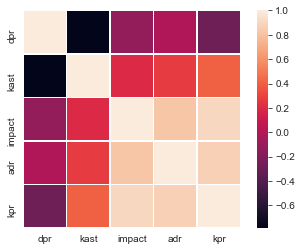

In [20]:
sns.set_style(style='dark')
sns.heatmap(corr, square=True, linewidths=.5)

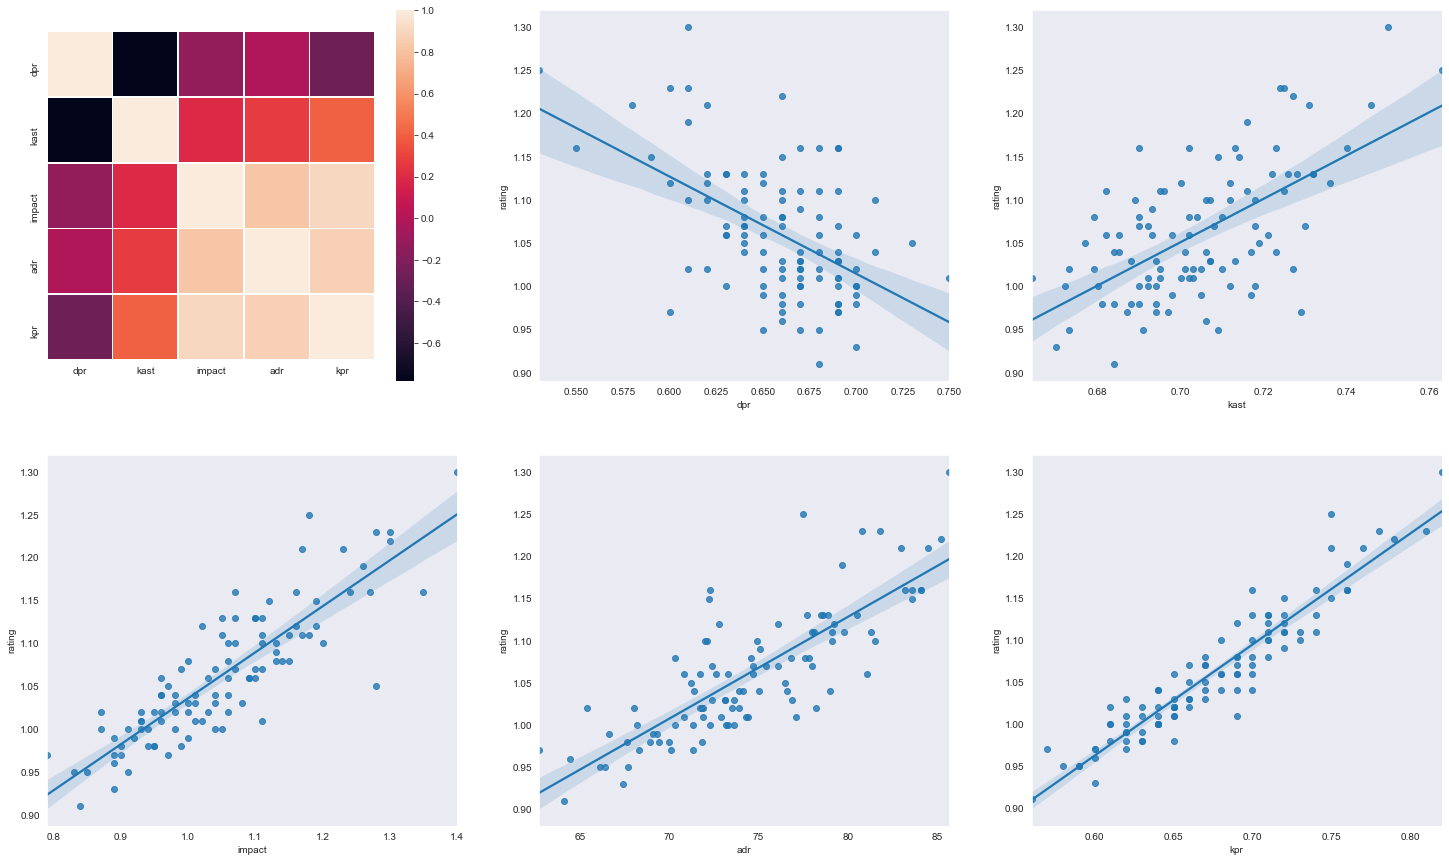

In [79]:
fig, ax = plt.subplots(2, 3, figsize=(25, 15))
column_index = 0
for i in range(0, 2):
    for j in range(0, 3):
        if i+j > 0:
            sns.regplot(x=df.columns[column_index], y='rating', data=df, ax=ax[i, j])
            column_index += 1
        else:
            sns.heatmap(corr, square=True, linewidths=.5, ax=ax[i, j])
plt.show()
fig.savefig('../images/plots.png', bbox_inches="tight")